In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os
from sklearn.model_selection import train_test_split
#importing RFE and Linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [98]:
df=pd.read_csv('train (4).csv')

In [99]:
df.shape

(1460, 81)

In [100]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [102]:
df['MasVnrType'].isnull().sum()

8

In [103]:
df['MasVnrArea'].dtype

dtype('float64')

In [104]:
df.shape

(1460, 81)

## Data Cleaning and Filling

In [105]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [106]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [107]:
df['PoolQC']=df["PoolQC"].replace(np.nan,'No Pool')

In [108]:
df.PoolQC.value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [109]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [110]:



df['Alley'] = df['Alley'].replace({np.nan: 'No Alley access'})


In [111]:
df.Alley.value_counts()

No Alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [112]:

df['FireplaceQu'] = df['FireplaceQu'].replace({np.nan: 'No Fireplace'})


In [113]:

df['Fence'] = df['Fence'].replace({np.nan: 'No Fence'})

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [115]:
df.isna().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [116]:

df['MiscFeature'] = df['MiscFeature'].replace({np.nan: 'No  Miscellaneous Features'})

In [117]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [118]:
#df.isnull().sum()/len(df)*100

In [119]:

df['GarageType'] = df['GarageType'].replace({np.nan: 'No Garage'})

In [120]:
#df.isnull().sum()/len(df)*100



In [121]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)

In [122]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [123]:
df['LotFrontage'].dtype

dtype('float64')

In [124]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [125]:

df['BsmtQual'] = df['BsmtQual'].replace({np.nan: 'No Basement'})

In [126]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [127]:
#df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)

In [128]:

df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [129]:
df['BsmtCond'].isnull().sum()

37

In [130]:

df['BsmtCond'] = df['BsmtCond'].replace({np.nan: 'No Basement'})

In [131]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [132]:

df['BsmtExposure'] = df['BsmtExposure'].replace({np.nan: 'No Basement'})

In [133]:
df.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [134]:

df['BsmtExposure'] = df['BsmtExposure'].replace({'No': 'No Exposure'})

In [135]:
df.BsmtExposure.value_counts()

No Exposure    953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [136]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [137]:

df['BsmtFinType1'] = df['BsmtFinType1'].replace({np.nan: 'No Basement'})

In [138]:

df['BsmtFinType2'] = df['BsmtFinType2'].replace({np.nan: 'No Basement'})

In [139]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
B

In [140]:
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

In [141]:

df['GarageFinish'] = df['GarageFinish'].replace({np.nan: 'No Garage'})

In [142]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
B

In [143]:
df['LotFrontage'].dtype

dtype('float64')

In [144]:
df['LotFrontage'].fillna(df['LotFrontage'].mean() , inplace=True)

In [145]:


df.isnull().sum()/len(df)*100


Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [146]:
df['MasVnrType'] = df['MasVnrType'].replace({"None": 'No Masonry Veneer'})



## Exploratory Data Analysis

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

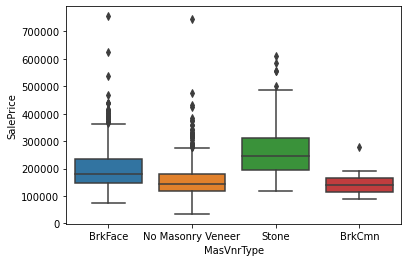

In [147]:
sns.boxplot(df['MasVnrType'],df['SalePrice'])
#SaleType is more more Stone

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

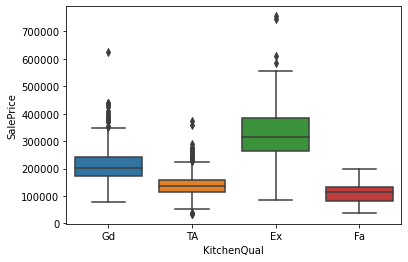

In [148]:
#This is obvious that exccelent Kitchen Quality has more SalePrice
sns.boxplot(df['KitchenQual'],df['SalePrice'])

In [149]:


df['MasVnrType'].value_counts()

No Masonry Veneer    864
BrkFace              445
Stone                128
BrkCmn                15
Name: MasVnrType, dtype: int64

In [150]:
df.head(76)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,No Alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No Exposure,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,No Alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry Veneer,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,No Alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,No Alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry Veneer,0.0,TA,TA,BrkTil,TA,Gd,No Exposure,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,No Alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,No Alley access,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,No Masonry Veneer,0.0,TA,TA,Wood,Gd,TA,No Exposure,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No Fireplace,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,No Alley access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,No Alley access,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No Pool,No Fence,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,No Alley access,Reg,Lvl,AllPub

In [152]:
df.isnull().sum()/len(df)*100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

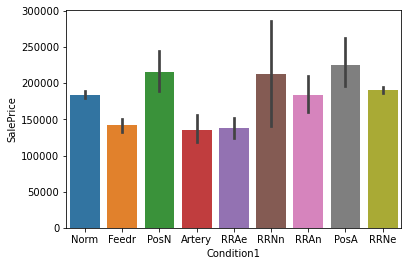

In [153]:
#the SalePrice is equal for Near positive off-site feature--park ie PosN , RRNn ie Within 200' of North-South Railroad this is becuase maybe ppl would like to have their house near station  and PosA which is the the area is aajcentto the positive features like parks and etc 
sns.barplot(x='Condition1', y='SalePrice', data=df)

In [154]:
df['Neighborhood'].replace({'Blmngtn':'Bloomington Heights', 'Blueste':'Bluestem','BrDale':'Briardale','BrkSide':'BrookSide','ClearCr':'Clear Creek','CollgCr':'College Creek','Crawfor':'Crawford','IDOTRR':'Iowa DOT and Rail Road','MeadowV':'Meadow Village','Mitchel':'Mitchell','NAmes':'North Ames','NoRidge':'NorthRidge',' NPkVill':'Northpark Villa','NridgHt':'Northridge Heights','NWAmes':'Northwest Ames','OldTown':'Old Town','SWISU':'South & West of Iowa State University','SawyerW':'Sawyer West','Somerst':'Somerset','StoneBr':'Stone Brook','Timber':'Timberland','NPkVill':'Northpark Villa'},inplace=True)

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

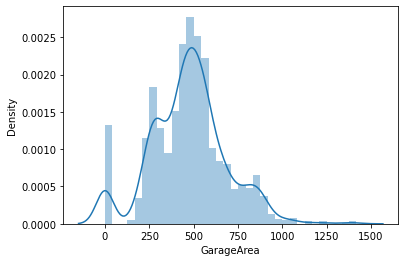

In [155]:


sns.distplot(df["GarageArea"])

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

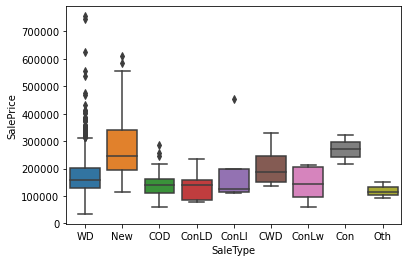

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='SaleType', y='SalePrice', data=df)
#this is clearly seen that  New Home just constructed and sold has more salePrice 

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

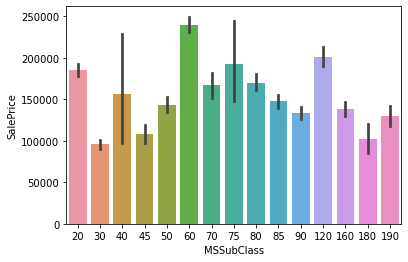

In [157]:

#Sale Price is more in 60
sns.barplot(x='MSSubClass', y='SalePrice', data=df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

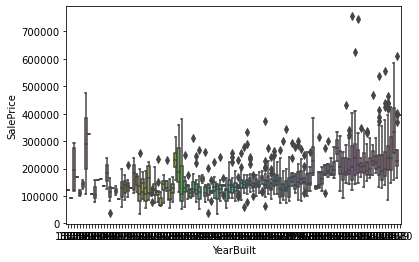

In [158]:
sns.boxplot(x='YearBuilt', y='SalePrice', data=df)
#there is a fluctuation in Saleprice 

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

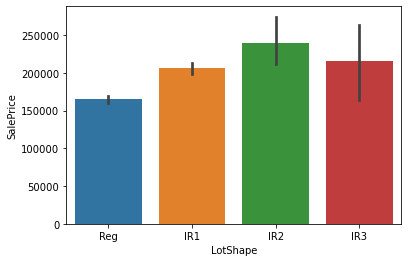

In [159]:
sns.barplot(x='LotShape', y='SalePrice', data=df)
#Lotshape is the shape of the property and SalePrice is more for Moderately Irregular Shape

In [160]:



df['LotShape'].replace({'Reg':'Regular', 'IR1':'Slightly irregular', 'IR2':'Moderately Irregular', 'IR3':'Irregular'},inplace=True)

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

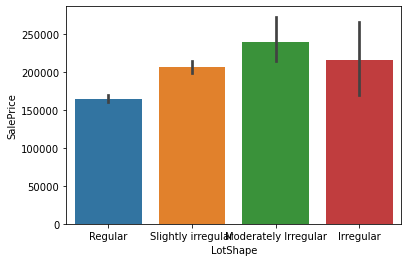

In [161]:
sns.barplot(x='LotShape', y='SalePrice', data=df)

In [162]:
df['LandContour'].replace({'Lvl':'Near Flat/Level', 'Bnk':'Banked', 'HLS':'Hillside','Low':'Depression'},inplace=True)

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

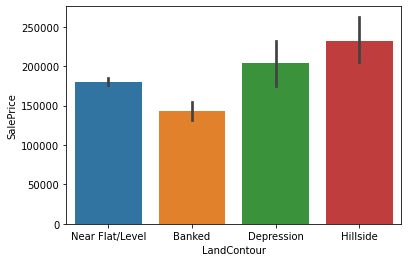

In [163]:
sns.barplot(x='LandContour', y='SalePrice', data=df)
#this feature shows the flatness of the property and SalePrice is more in HillSide 

In [164]:
df['Utilities'].replace({'AllPub':'All public Utilities', 'NoSeWa':'Electricity and Gas Only'},inplace=True)

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

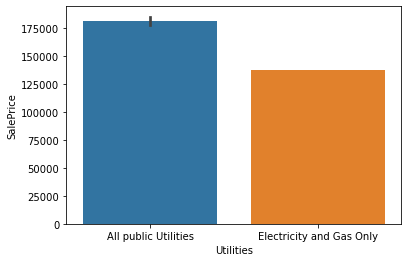

In [165]:
sns.barplot(x='Utilities', y='SalePrice', data=df)
# Here if the ppl are getting all of their utilities nearby then also the Sale Price is high 

In [166]:
df['LandSlope'].replace({'Gtl':'Gentle Slope', 'Mod':'Moderate Slope','Sev':'Severe Slope'},inplace=True)

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

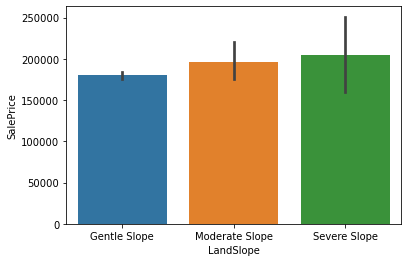

In [167]:

sns.barplot(x='LandSlope', y='SalePrice', data=df)
#Sale Price is high for Severe Slope 

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

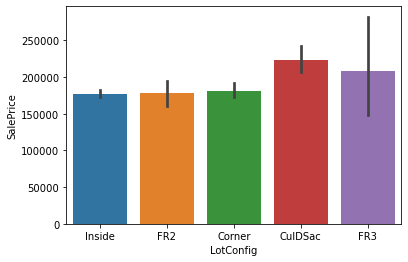

In [168]:

sns.barplot(x='LotConfig', y='SalePrice', data=df)
#SalePrice is high for CulDSac

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

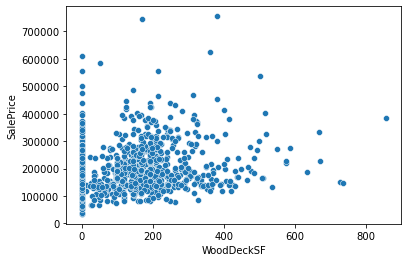

In [169]:
sns.scatterplot(df["WoodDeckSF"],df["SalePrice"])
#Wood deck area in square feet there is a slight increase in SalePrice

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

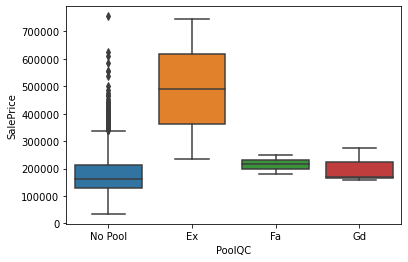

In [170]:
sns.boxplot(df['PoolQC'],df['SalePrice'])
#SalePrice is high for Excellent Pool Quality

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

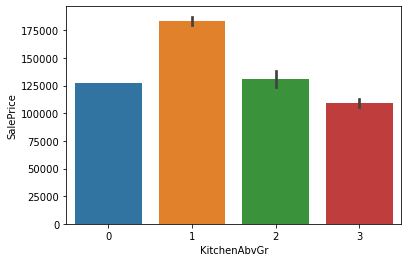

In [171]:
sns.barplot(df['KitchenAbvGr'],df['SalePrice'])

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

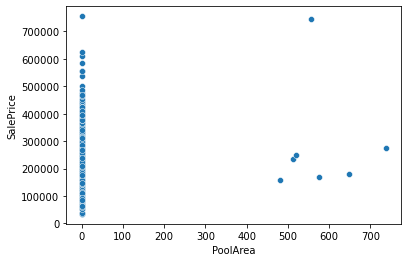

In [172]:



sns.scatterplot(df["PoolArea"],df["SalePrice"])

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

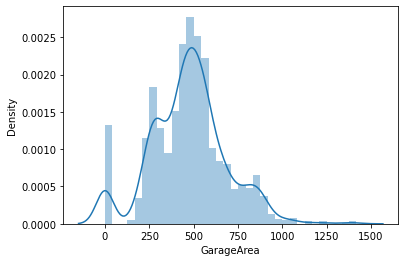

In [173]:


sns.distplot(df["GarageArea"])

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

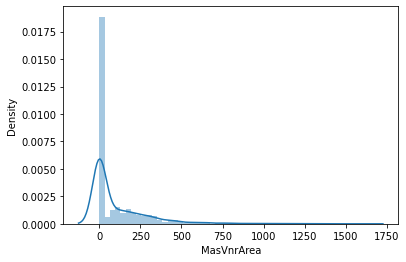

In [174]:


sns.distplot(df["MasVnrArea"])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

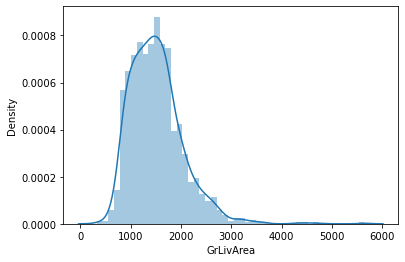

In [175]:
sns.distplot(df['GrLivArea'])

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

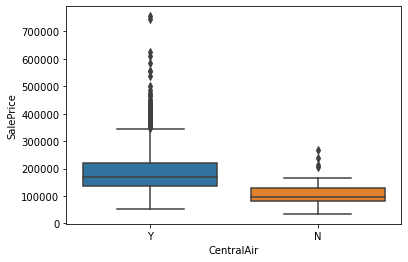

In [176]:
sns.boxplot(df['CentralAir'],df['SalePrice'])
#SalePrice is high where there is CentralAir

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

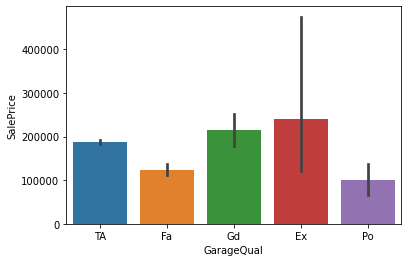

In [177]:
sns.barplot(df['GarageQual'],df['SalePrice'])
#this is also inferring that  where GarageQual is Excellent SalePrice is high 

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

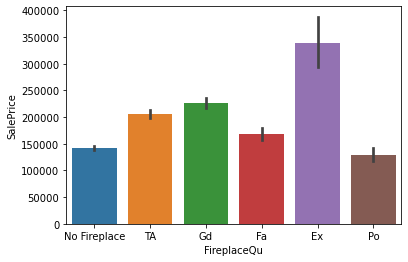

In [178]:
sns.barplot(df['FireplaceQu'],df['SalePrice'])

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

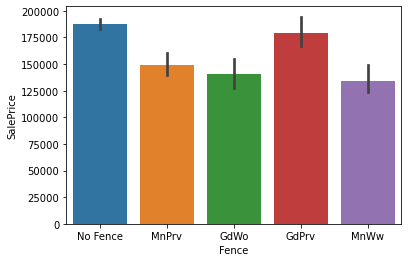

In [179]:
sns.barplot(df['Fence'],df['SalePrice'])

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

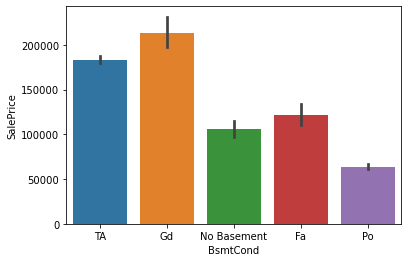

In [180]:
sns.barplot(df['BsmtCond'],df['SalePrice'])

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

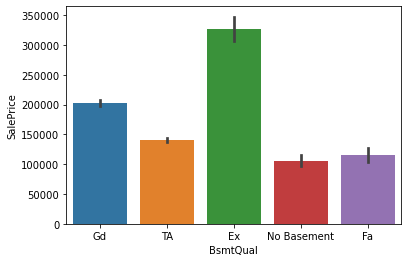

In [181]:
sns.barplot(df['BsmtQual'],df['SalePrice'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

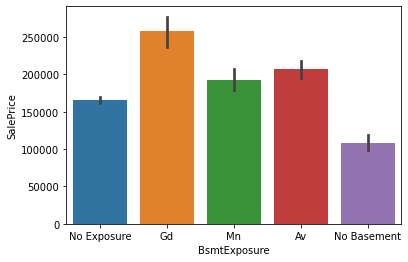

In [182]:
sns.barplot(df['BsmtExposure'],df['SalePrice'])

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

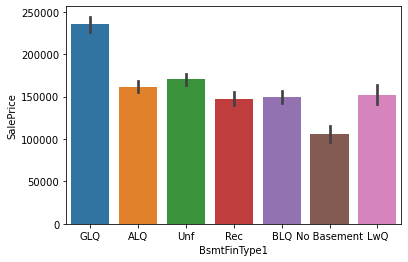

In [183]:
sns.barplot(df['BsmtFinType1'],df['SalePrice'])


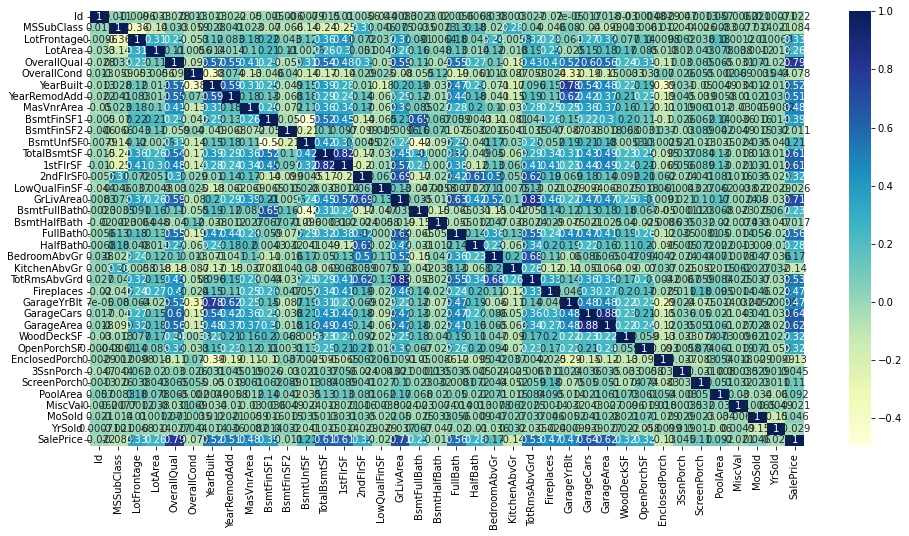

In [184]:
plt.figure(figsize=(16,8))
cor=df.corr()
# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [185]:
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [186]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [187]:
df = pd.get_dummies(data=df,columns=["MSZoning","Street","LotShape",'LandContour','Utilities'],drop_first=True)

In [188]:

df.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only
0,1,60,65.0,8450,No Alley access,Inside,Gentle Slope,College Creek,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No Exposure,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,2,2008,WD,Normal,208500,0,0,1,0,1,0,1,0,0,0,1,0
1,2,20,80.0,9600,No Alley access,FR2,Gentle Slope,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry Veneer,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,5,2007,WD,Normal,181500,0,0,1,0,1,0,1,0,0,0,1,0
2,3,60,68.0,11250,No Alley access,Inside,Gentle Slope,College Creek,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,9,2008,WD,Normal,223500,0,0,1,0,1,0,0,1,0,0,1,0
3,4,70,60.0,9550,No Alley access,Corner,Gentle Slope,Crawford,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry Veneer,0.0,TA,TA,BrkTil,TA,Gd,No Exposure,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,2,2006,WD,Abnorml,140000,0,0,1,0,1,0,0,1,0,0,1,0
4,5,60,84.0,14260,No Alley access,FR2,Gentle Slope,NorthRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,12,2008,WD,Normal,250000,0,0,1,0,1,0,0,1,0,0,1,0


In [189]:
df = pd.get_dummies(data=df,columns=["LotConfig","LandSlope","Neighborhood",'Condition1','Condition2','BldgType','HouseStyle'],drop_first=True)

In [190]:

df = pd.get_dummies(data=df,columns=["RoofStyle","RoofMatl","Exterior1st",'Exterior2nd'],drop_first=True)

In [191]:







df = pd.get_dummies(data=df,columns=["MasVnrType",'ExterQual','ExterCond','Foundation'],drop_first=True)

In [192]:
df= pd.get_dummies(data=df,columns=['BsmtQual','BsmtCond','BsmtExposure'],drop_first=True)

In [193]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_Bluestem,Neighborhood_Briardale,Neighborhood_BrookSide,Neighborhood_Clear Creek,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Meadow Village,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_NorthRidge,Neighborhood_Northpark Villa,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Neighborhood_South & West of Iowa State University,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry Veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No Basement,BsmtExposure_No Exposure
0,1,60,65.0,8450,No Alley access,7,5,2003,2003,196.0,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,2,2008,WD,Normal,208500,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,2,20,80.0,9600,No Alley access,6,8,1976,1976,0.0,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Miscellaneous Features,0,5,2007,WD,Normal,181500,0,0,1,0,1

In [194]:
df= pd.get_dummies(data=df,columns=['BsmtFinType1','BsmtFinType2','Heating'],drop_first=True)

In [195]:
df= pd.get_dummies(data=df,columns=['HeatingQC','CentralAir','Electrical','KitchenQual'],drop_first=True)

In [196]:
df= pd.get_dummies(data=df,columns=['Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'],drop_first=True)

In [197]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_Bluestem,Neighborhood_Briardale,Neighborhood_BrookSide,Neighborhood_Clear Creek,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Meadow Village,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_NorthRidge,Neighborhood_Northpark Villa,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Neighborhood_South & West of Iowa State University,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry Veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,Sale

In [198]:
df.drop(['Id'],axis=1,inplace=True)

In [199]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [200]:
df= pd.get_dummies(data=df,columns=['Alley','FireplaceQu','Fence','MiscFeature','PoolQC'],drop_first=True)

In [201]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_Bluestem,Neighborhood_Briardale,Neighborhood_BrookSide,Neighborhood_Clear Creek,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Meadow Village,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_NorthRidge,Neighborhood_Northpark Villa,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Neighborhood_South & West of Iowa State University,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry Veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,Sal

In [202]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.columns

Index([], dtype='object')

In [203]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_Bluestem,Neighborhood_Briardale,Neighborhood_BrookSide,Neighborhood_Clear Creek,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Meadow Village,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_NorthRidge,Neighborhood_Northpark Villa,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Neighborhood_South & West of Iowa State University,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry Veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,Sal

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

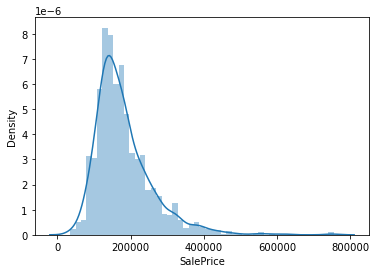

In [204]:
sns.distplot(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

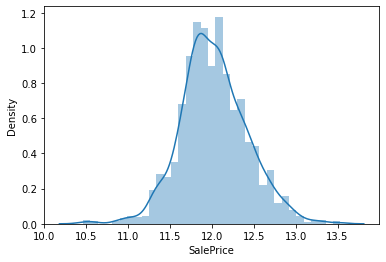

In [205]:
sns.distplot(np.log(df["SalePrice"]))

In [206]:
df["SalePrice"] = np.log(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

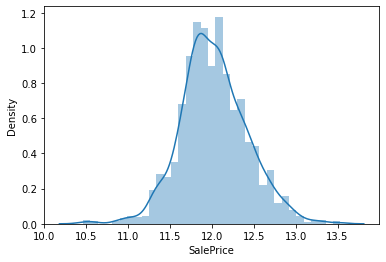

In [207]:
sns.distplot(df["SalePrice"])

In [208]:
df.isnull().sum()/len(df)*100

MSSubClass                                            0.0
LotFrontage                                           0.0
LotArea                                               0.0
OverallQual                                           0.0
OverallCond                                           0.0
YearBuilt                                             0.0
YearRemodAdd                                          0.0
MasVnrArea                                            0.0
BsmtFinSF1                                            0.0
BsmtFinSF2                                            0.0
BsmtUnfSF                                             0.0
TotalBsmtSF                                           0.0
1stFlrSF                                              0.0
2ndFlrSF                                              0.0
LowQualFinSF                                          0.0
GrLivArea                                             0.0
BsmtFullBath                                          0.0
BsmtHalfBath  

In [209]:
# we got how old the house is
df['House_Built_Duration'] = df['YrSold']-df['YearBuilt']
#Drop YrSold, YearBuilt after HouseAge

In [210]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_Bluestem,Neighborhood_Briardale,Neighborhood_BrookSide,Neighborhood_Clear Creek,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Meadow Village,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_NorthRidge,Neighborhood_Northpark Villa,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Neighborhood_South & West of Iowa State University,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry Veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,Sal

In [211]:
df.drop(['YrSold','YearBuilt'],axis=1,inplace=True)

In [212]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_Bluestem,Neighborhood_Briardale,Neighborhood_BrookSide,Neighborhood_Clear Creek,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Meadow Village,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_NorthRidge,Neighborhood_Northpark Villa,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Neighborhood_South & West of Iowa State University,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry Veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca

## Model Building

In [213]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)


(1021, 257)
(439, 257)


In [214]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Flat/Level,Utilities_Electricity and Gas Only,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_Bluestem,Neighborhood_Briardale,Neighborhood_BrookSide,Neighborhood_Clear Creek,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Meadow Village,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_NorthRidge,Neighborhood_Northpark Villa,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Neighborhood_South & West of Iowa State University,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry Veneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca

In [216]:
scaler= MinMaxScaler()
#create a list of numeric var

num_vars=['MSSubClass','LotFrontage','LotArea','SalePrice','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
          'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
          'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
          'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','House_Built_Duration','OverallQual','OverallCond']

#2 . fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [217]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [218]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=100)# running RFE
rfe= rfe.fit(X_train,y_train)

In [219]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 21),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 124),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 137),
 ('FullBath', False, 69),
 ('HalfBath', False, 109),
 ('BedroomAbvGr', False, 30),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 141),
 ('Fireplaces', False, 133),
 ('GarageYrBlt', False, 145),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 76),
 ('EnclosedPorch', False, 17),
 ('3SsnPorch', False, 12),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 47),
 ('MiscVal', False, 107),
 ('MoSold', False, 110),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 

In [220]:
# Subset the features selected by rfe1
import statsmodels.api as sm
cols_supported = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[cols_supported]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [221]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model=lr.fit() 

In [222]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:29:05   Log-Likelihood:                 2142.1
No. Observations:                1021   AIC:                            -4106.
Df Residuals:                     932   BIC:                            -3668.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -0.1175      0.046     -2.556      0.011      -0.208      -0.027
LotFrontage                                            0.0593      0.018      3.364      0.001       0.025       0.094
LotArea                                                0.2217      0.032      7.036      0.000       0.160       0.284
OverallQual                                            0.1522      0.013     12.160      0.000       0.128       0.177
OverallCond                                            0.0959      0.010      9.338      0.000       0.076       0.116
YearRemodAdd                                           0.0267      0.005      5.767      0.000       0.018       0.036
BsmtFinSF1                                             0.1957      0.020      9.858      0.000       0.157       0.235
BsmtFinSF2                                             0.0213      0.010      2.100      0.036       0.001       0.041
BsmtUnfSF                                              0.0240      0.009      2.681      0.007       0.006       0.042
TotalBsmtSF                                            0.1951      0.021      9.131      0.000       0.153       0.237
1stFlrSF                                               0.2201      0.018     12.287      0.000       0.185       0.255
2ndFlrSF                                               0.1163      0.007     16.591      0.000       0.103       0.130
LowQualFinSF                                           0.0036      0.013      0.279      0.780      -0.022       0.029
GrLivArea                                              0.2307      0.013     17.340      0.000       0.205       0.257
BsmtFullBath                                           0.0273      0.008      3.399      0.001       0.012       0.043
KitchenAbvGr                                          -0.0752      0.011     -6.786      0.000      -0.097      -0.053
GarageCars                                             0.0268      0.014      1.928      0.054      -0.000       0.054
GarageArea                                             0.0460      0.017      2.775      0.006       0.013       0.078
WoodDeckSF                                             0.0275      0.008      3.541      0.000       0.012       0.043
ScreenPorch                                            0.0182      0.008      2.428      0.015       0.003       0.033
MSZoning_FV                                            0.1290      0.017      7.443      0.000       0.095       0.163
MSZoning_RH                                            0.1369      0.017      7.943      0.000       0.103       0.171
MSZoning_RL                                            0.1383      0.015      9.484      0.000       0.110  

In [223]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=80)# running RFE
rfe= rfe.fit(X_train,y_train)

In [224]:
# Subset the features selected by rfe1
import statsmodels.api as sm
cols_supported = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[cols_supported]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [225]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model=lr.fit() 

In [226]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:29:09   Log-Likelihood:                 2078.1
No. Observations:                1021   AIC:                            -4018.
Df Residuals:                     952   BIC:                            -3678.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -0.1340      0.041     -3.251      0.001      -0.215      -0.053
LotFrontage                                            0.0593      0.018      3.273      0.001       0.024       0.095
LotArea                                                0.2215      0.032      6.825      0.000       0.158       0.285
OverallQual                                            0.1780      0.013     14.152      0.000       0.153       0.203
OverallCond                                            0.0972      0.010      9.558      0.000       0.077       0.117
YearRemodAdd                                           0.0279      0.005      5.810      0.000       0.018       0.037
BsmtFinSF1                                             0.2105      0.021     10.196      0.000       0.170       0.251
BsmtFinSF2                                             0.0266      0.010      2.546      0.011       0.006       0.047
BsmtUnfSF                                              0.0322      0.009      3.473      0.001       0.014       0.050
TotalBsmtSF                                            0.2131      0.022      9.611      0.000       0.170       0.257
1stFlrSF                                               0.1996      0.019     10.732      0.000       0.163       0.236
2ndFlrSF                                               0.1145      0.007     15.752      0.000       0.100       0.129
LowQualFinSF                                          -0.0008      0.012     -0.069      0.945      -0.025       0.023
GrLivArea                                              0.2127      0.014     15.486      0.000       0.186       0.240
BsmtFullBath                                           0.0253      0.008      3.008      0.003       0.009       0.042
KitchenAbvGr                                          -0.0835      0.011     -7.328      0.000      -0.106      -0.061
GarageCars                                             0.0339      0.014      2.349      0.019       0.006       0.062
GarageArea                                             0.0391      0.017      2.280      0.023       0.005       0.073
WoodDeckSF                                             0.0264      0.008      3.287      0.001       0.011       0.042
MSZoning_FV                                            0.1359      0.015      9.329      0.000       0.107       0.165
MSZoning_RH                                            0.1222      0.017      7.367      0.000       0.090       0.155
MSZoning_RL                                            0.1254      0.014      9.210      0.000       0.099       0.152
MSZoning_RM                                            0.1126      0.014      8.250      0.000       0.086  

In [227]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=50)# running RFE
rfe= rfe.fit(X_train,y_train)

In [228]:
cols_supported = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[cols_supported]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [229]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model=lr.fit() 

In [230]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     283.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:29:13   Log-Likelihood:                 1992.5
No. Observations:                1021   AIC:                            -3893.
Df Residuals:                     975   BIC:                            -3666.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1173      0.019     -6.262      0.000      -0.154      -0.081
LotArea                      0.2358      0.032      7.274      0.000       0.172       0.299
OverallQual                  0.2039      0.013     16.209      0.000       0.179       0.229
OverallCond                  0.1290      0.010     13.296      0.000       0.110       0.148
BsmtFinSF1                   0.2446      0.020     12.005      0.000       0.205       0.285
BsmtFinSF2                   0.0384      0.011      3.505      0.000       0.017       0.060
BsmtUnfSF                    0.0261      0.009      2.783      0.005       0.008       0.045
TotalBsmtSF                  0.2452      0.022     10.914      0.000       0.201       0.289
1stFlrSF                     0.1524      0.109      1.400      0.162      -0.061       0.366
2ndFlrSF                     0.0823      0.051      1.618      0.106      -0.018       0.182
GrLivArea                    0.3170      0.126      2.512      0.012       0.069       0.565
KitchenAbvGr                -0.0805      0.012     -6.882      0.000      -0.104      -0.058
GarageCars                   0.0729      0.008      8.905      0.000       0.057       0.089
MSZoning_FV                  0.1397      0.015      9.260      0.000       0.110       0.169
MSZoning_RH                  0.1294      0.017      7.661      0.000       0.096       0.163
MSZoning_RL                  0.1293      0.014      9.260      0.000       0.102       0.157
MSZoning_RM                  0.1124      0.014      7.960      0.000       0.085       0.140
LandSlope_Severe Slope      -0.0742      0.019     -3.912      0.000      -0.111      -0.037
Neighborhood_Briardale      -0.0479      0.011     -4.402      0.000      -0.069      -0.027
Neighborhood_Crawford        0.0422      0.007      6.330      0.000       0.029       0.055
Condition2_PosN             -0.6429      0.037    -17.512      0.000      -0.715      -0.571
Condition2_RRAe             -0.2043      0.058     -3.541      0.000      -0.318      -0.091
Condition2_RRAn             -0.0511      0.036     -1.428      0.154      -0.121       0.019
RoofStyle_Shed               0.1679      0.045      3.739      0.000       0.080       0.256
RoofMatl_CompShg             0.0755      0.010      7.622      0.000       0.056       0.095
RoofMatl_Membran             0.2483      0.036      6.879      0.000       0.177       0.319
RoofMatl_Metal               0.2102      0.036      5.908      0.000       0.140       0.280
RoofMatl_Roll                0.0722      0.033      2.185      0.029       0.007       0.137
RoofMatl_Tar&Grv             0.1332      0.018      7.561      0.000       0.099       0.168
RoofMatl_WdShake             0.0320      0.021      1.498      0.134      -0.010       0.074
RoofMatl_WdShn

In [231]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=40)# running RFE
rfe= rfe.fit(X_train,y_train)

In [232]:
cols_supported = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[cols_supported]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [233]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model=lr.fit() 

In [234]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     321.1
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:29:17   Log-Likelihood:                 1968.5
No. Observations:                1021   AIC:                            -3859.
Df Residuals:                     982   BIC:                            -3667.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1174      0.019     -6.164      0.000      -0.155      -0.080
LotArea                      0.2415      0.033      7.316      0.000       0.177       0.306
OverallQual                  0.2097      0.013     16.539      0.000       0.185       0.235
OverallCond                  0.1308      0.010     13.294      0.000       0.112       0.150
BsmtFinSF1                   0.1612      0.017      9.393      0.000       0.128       0.195
TotalBsmtSF                  0.3413      0.045      7.657      0.000       0.254       0.429
1stFlrSF                     0.1560      0.110      1.418      0.156      -0.060       0.372
2ndFlrSF                     0.0806      0.051      1.568      0.117      -0.020       0.181
GrLivArea                    0.3122      0.127      2.449      0.014       0.062       0.562
KitchenAbvGr                -0.0812      0.012     -6.904      0.000      -0.104      -0.058
GarageCars                   0.0760      0.008      9.198      0.000       0.060       0.092
MSZoning_FV                  0.1419      0.015      9.228      0.000       0.112       0.172
MSZoning_RH                  0.1277      0.017      7.416      0.000       0.094       0.162
MSZoning_RL                  0.1271      0.014      8.934      0.000       0.099       0.155
MSZoning_RM                  0.1109      0.014      7.705      0.000       0.083       0.139
LandSlope_Severe Slope      -0.0746      0.019     -3.861      0.000      -0.113      -0.037
Neighborhood_Briardale      -0.0484      0.011     -4.365      0.000      -0.070      -0.027
Neighborhood_Crawford        0.0420      0.007      6.225      0.000       0.029       0.055
Condition2_PosN             -0.6230      0.037    -16.717      0.000      -0.696      -0.550
Condition2_RRAe             -0.2022      0.059     -3.440      0.001      -0.318      -0.087
Condition2_RRAn             -0.0583      0.036     -1.598      0.110      -0.130       0.013
RoofStyle_Shed               0.1671      0.046      3.651      0.000       0.077       0.257
RoofMatl_CompShg             0.0728      0.010      7.216      0.000       0.053       0.093
RoofMatl_Membran             0.2558      0.036      7.009      0.000       0.184       0.327
RoofMatl_Metal               0.2067      0.036      5.700      0.000       0.136       0.278
RoofMatl_Roll                0.0697      0.034      2.067      0.039       0.004       0.136
RoofMatl_Tar&Grv             0.1306      0.018      7.271      0.000       0.095       0.166
RoofMatl_WdShake             0.0278      0.022      1.279      0.201      -0.015       0.071
RoofMatl_WdShngl             0.0777      0.019      4.022      0.000       0.040       0.116
Exterior1st_BrkComm         -0.1109      0.028     -3.997      0.000      -0.165      -0.056
BsmtQual_No Ba

In [235]:
y_pred = lr_model.predict(X_train_rfe)

In [236]:

r2_score(y_true= y_train , y_pred= y_pred)

0.9255143666544902

In [237]:

res=y_train-y_pred


<AxesSubplot:ylabel='Density'>

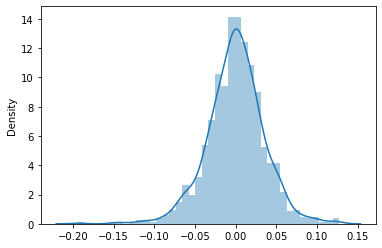

In [238]:
sns.distplot(res) 

In [240]:
num_vars=['MSSubClass','LotFrontage','LotArea','SalePrice','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
          'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
          'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
          'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','House_Built_Duration','OverallQual','OverallCond']
#2 . fit on data
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [241]:
y_test=df_test.pop('SalePrice')
X_test=df_test

In [242]:
# Using the training cols for predictions
X_test_rfe_test = X_test[cols_supported]

In [243]:
X_test_rfe_test= sm.add_constant(X_test_rfe_test)

In [244]:
y_pred_test=lr_model.predict(X_test_rfe_test)

In [245]:

r2_score(y_true= y_test , y_pred= y_pred_test)

0.5745094608065007

In [246]:
y_pred_train = lr_model.predict(X_train_rfe)
y_pred_test = lr_model.predict(X_test_rfe_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9255143666544902
0.5745094608065007
1.2645153276401173
3.2574488090613962
0.0012385066872087338
0.007420156740458761


###  Ridge

In [247]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [248]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [249]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.          0.19692167  0.21782531  0.12793607  0.15172522  0.27775226
  0.21036694  0.09303492  0.26087767 -0.07629485  0.08098882  0.13327069
  0.12000693  0.12096833  0.10245267 -0.03998448 -0.04962675  0.04262402
 -0.54389195 -0.12627202 -0.05176297  0.10953731  0.08374951  0.21373535
  0.16663606  0.07258707  0.13033618  0.04273497  0.09628434 -0.10183201
  0.0321269   0.0321269   0.10887654 -0.04600318  0.04473517  0.05247503
 -0.14160595  0.04958121  0.05725105 -0.80606347 -0.13847232]


In [250]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test1 = ridge.predict(X_test_rfe_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training R2 Score",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test1)
print("Test R2 score",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test1))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test1)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


Training R2 Score 0.9241053798921945
Test R2 score 0.659642794944125
1.2884351800645484
2.6056893635431133
0.0012619345544216927
0.005935511078685908


## Lasso Regression

In [251]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [252]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [253]:

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe,y_train) 

Lasso(alpha=0.0001)

In [254]:

lasso.coef_

array([ 0.00000000e+00,  1.28742855e-01,  2.33958744e-01,  1.24405231e-01,
        1.49934986e-01,  2.02004851e-01,  4.82160855e-02,  0.00000000e+00,
        4.64745993e-01, -6.11517509e-02,  8.58224703e-02,  7.60732823e-02,
        5.76058268e-02,  6.90264166e-02,  4.50342467e-02,  8.39373351e-03,
       -4.13246864e-02,  4.03919054e-02, -4.65099817e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.31268857e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.48426879e-03,
        0.00000000e+00, -3.66171417e-02,  3.05328428e-05,  1.97013645e-18,
        0.00000000e+00,  0.00000000e+00,  2.39244442e-02,  3.26585815e-02,
       -2.26121380e-02,  3.21480537e-02,  1.96791742e-02, -7.98841029e-01,
       -1.36777668e-01])

In [255]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training for Lasso ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing  for lasso ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

Training for Lasso  0.914971615471937
Testing  for lasso  0.6683794165026954
1.4434957546977092
2.53880398097943
0.0014138058322210668
0.005783152576262938


In [256]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.925514,0.924105,0.914972
1,R2 Score (Test),0.574509,0.659643,0.668379
2,RSS (Train),1.264515,1.288435,1.443496
3,RSS (Test),3.257449,2.605689,2.538804
4,MSE (Train),0.035192,0.035524,0.037601
5,MSE (Test),0.086140,0.077042,0.076047


In [257]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [258]:
betas.index = X_train_rfe.columns

In [259]:
betas['Linear']=lr_model.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [260]:
pd.set_option('display.max_rows', None)
betas.head(20)

,Linear,Ridge,Lasso
const,-0.117413,0.000000,0.000000
LotArea,0.241489,0.196922,0.128743
OverallQual,0.209714,0.217825,0.233959
OverallCond,0.130839,0.127936,0.124405
BsmtFinSF1,0.161217,0.151725,0.149935
TotalBsmtSF,0.341305,0.277752,0.202005
1stFlrSF,0.156011,0.210367,0.048216
2ndFlrSF,0.080578,0.093035,0.000000
GrLivArea,0.312240,0.260878,0.464746
KitchenAbvGr,-0.081196,-0.076295,-0.061152


## After Doubling the alpha values


In [261]:

alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print("Coefficients ",ridge.coef_)
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("Training Set",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing Set ",r2_test_lr)

Coefficients  [ 0.          0.16942412  0.2235736   0.12612259  0.14376942  0.23806208
  0.22133925  0.09094428  0.25099881 -0.0721864   0.08498527  0.12599358
  0.11326633  0.11564575  0.09539123 -0.01934583 -0.05029065  0.04321017
 -0.48345138 -0.08834068 -0.04696939  0.08044756  0.07965248  0.17664287
  0.13212097  0.06235494  0.11845203  0.04011578  0.09666109 -0.0946719
  0.02132592  0.02132592  0.08108861 -0.03216604  0.0433988   0.05003296
 -0.12387833  0.04748235  0.05476928 -0.70600015 -0.13824269]
Training Set 0.9214297414621937
Testing Set  0.7083402071370458


# R2 score value has increase from 0.74 to 0.79 for Ridge Regression after doubling the values 

In [262]:

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe_test)
print("Coefficients ",lasso.coef_)

r2_train_lr = r2_score(y_train, y_pred_train)
print("Training  Lasso ",r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing  lasso ",r2_test_lr)



Coefficients  [ 0.00000000e+00  8.13714255e-02  2.52151848e-01  1.22454156e-01
  1.29597383e-01  1.59594498e-01  5.41822562e-02  0.00000000e+00
  4.32926120e-01 -4.84730426e-02  9.20216647e-02  2.98898497e-02
  7.28701969e-03  2.85998540e-02  0.00000000e+00  1.14557681e-02
 -3.35335663e-02  3.92591236e-02 -3.27932574e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -3.86931159e-04  3.31164672e-03  1.53537212e-02
 -0.00000000e+00  1.71497698e-02  0.00000000e+00 -6.15955069e-01
 -1.33486167e-01]
Training  Lasso  0.9016183103590171
Testing  lasso  0.7512093910869259


## Lasso has  a increase in coefficients after making the alpha value double


In [263]:

# Lasso regression is performing well with the test data

In [264]:
# we can use Lasso regression as here the coefficients are pretty descent

In [265]:
#In linear regression we got overfitted model 

In [266]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test1 = ridge.predict(X_test_rfe_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training R2 Score",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test1)
print("Test R2 score",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test1))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test1)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)



Training R2 Score 0.9214297414621937
Test R2 score 0.7083402071370458
1.3338585141223351
2.2328741943671373
0.0013064236181413664
0.0050862737912691055


In [267]:
betas['Ridge'] = ridge.coef_

betas['Lasso'] = lasso.coef_

In [268]:
betas.head(10)

,Linear,Ridge,Lasso
const,-0.117413,0.000000,0.000000
LotArea,0.241489,0.169424,0.081371
OverallQual,0.209714,0.223574,0.252152
OverallCond,0.130839,0.126123,0.122454
BsmtFinSF1,0.161217,0.143769,0.129597
TotalBsmtSF,0.341305,0.238062,0.159594
1stFlrSF,0.156011,0.221339,0.054182
2ndFlrSF,0.080578,0.090944,0.000000
GrLivArea,0.312240,0.250999,0.432926
KitchenAbvGr,-0.081196,-0.072186,-0.048473


In [269]:
#Drop 5 features
X_train_rfe = X_train_rfe.drop(['LotArea', 'OverallCond', 'OverallQual', 'BsmtFinSF1'
                               , 'TotalBsmtSF'], axis=1)

In [270]:
#Drop 5 features
X_test_rfe_test = X_test_rfe_test.drop(['LotArea', 'OverallCond', 'OverallQual', 'BsmtFinSF1'
                               , 'TotalBsmtSF'], axis=1)

In [271]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [272]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [273]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe,y_train) 

Lasso(alpha=0.0001)

In [274]:
lasso.coef_


array([ 0.        ,  0.30180861,  0.01017716,  0.58066767, -0.14128929,
        0.11656714,  0.12228643,  0.09713733,  0.11107476,  0.0963879 ,
        0.02973188, -0.03632475,  0.05616963, -0.45314131, -0.        ,
       -0.        ,  0.        , -0.        ,  0.07759003,  0.        ,
       -0.        ,  0.        , -0.01922452,  0.03939034, -0.07915885,
       -0.05833217, -0.        , -0.        , -0.        ,  0.05422345,
        0.04393598, -0.03295363,  0.07787884,  0.0097307 , -0.68424176,
       -0.17442181])

In [275]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8602370274552393
0.6495821397828737


In [276]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [277]:
betas.index = X_train_rfe.columns

In [278]:

betas['Lasso'] = lasso.coef_

In [279]:
betas.head(6)

,Lasso
const,0.000000
1stFlrSF,0.301809
2ndFlrSF,0.010177
GrLivArea,0.580668
KitchenAbvGr,-0.141289
GarageCars,0.116567


In [280]:
#R2 score has decreased